In [7]:
import os
import scanpy as sc
import diffxpy.api as de
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#adata = sc.read_h5ad("updated_annotated_adata.h5ad")
#adata

In [ ]:
#######################

In [20]:
import diffxpy.api as de
import scipy.sparse as sp
import numpy as np

cell_key = 'cell_type'
stage_key = 'braak_stage'
donor_key = 'donor_id'
#formula = "~ 1 + braak_stage + donor_id"
formula = "~ 1 + braak_stage"


# 1️⃣ List all unique cell‐types
celltypes = adata.obs[cell_key].unique().tolist()

# 2️⃣ Container for DE summaries
de_summaries = {}

# 3️⃣ Loop over cell‐types
for ctype in celltypes:
    subset = adata[adata.obs[cell_key] == ctype].copy()
    n_cells = subset.n_obs
    print(f'Running DE for {ctype} with {n_cells} nuclei')

    # ──> Pull raw counts from layers['counts'], not from subset.X
    
    counts_mat = subset.X

    # ──> Densify if needed (diffxpy expects a dense array)
    if sp.issparse(counts_mat):
        try:
            X_dense = counts_mat.toarray()
        except MemoryError:
            raise RuntimeError(
                f"Densification failed for cell‐type '{ctype}': "
                "the resulting array is too large to fit in memory. "
                "Consider downsampling or using a machine with more RAM."
            )
    else:
        # Already dense (e.g. numpy.ndarray)
        X_dense = counts_mat

    # ──> Run Wald test (~ 1 + braak_stage). We still pass subset.obs as sample_description.
    test = de.test.wald(
        data               = X_dense,
        sample_description = subset.obs,
        formula_loc        = formula,
        factor_loc_totest  = stage_key,
        gene_names         = subset.var_names
    )

    # Tidy result as pandas DataFrame (sorted by q‐value) and store
    de_summaries[ctype] = test.summary().sort_values('qval')

# After the loop, de_summaries dict holds one DataFrame per cell‐type,
# each sorted by q‐value.


Running DE for Excitatory neurons with 14138 nuclei
training location model: False
training scale model: True
iter   0: ll=10736789.190329
iter   1: ll=10736789.190329, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=9107157.225950, converged: 1.15% (loc: 1.15%, scale update: True), in 41.51sec
iter   3: ll=9107157.225950, converged: 1.15% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=9086226.234158, converged: 89.75% (loc: 89.75%, scale update: True), in 38.54sec
iter   5: ll=9086226.234158, converged: 89.75% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=9082605.206803, converged: 95.45% (loc: 95.45%, scale update: True), in 13.64sec
iter   7: ll=9082605.206803, converged: 95.45% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=9081911.832221, converged: 98.75% (loc: 98.75%, scale update: True), in 12.68sec
iter   9: ll=9081911.832221, converged: 98.75% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\dask\array\core.py:2894: RuntimeWarning: divide by zero encountered in divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


caught 101 linalg singular matrix errors
Running DE for Oligodendrocyte precursor cells with 8330 nuclei
training location model: False
training scale model: True
iter   0: ll=5388186.819628
iter   1: ll=5388186.819628, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=2427668.093426, converged: 3.25% (loc: 3.25%, scale update: True), in 28.56sec
iter   3: ll=2427668.093426, converged: 3.25% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=2386492.483488, converged: 81.40% (loc: 81.40%, scale update: True), in 25.96sec
iter   5: ll=2386492.483488, converged: 81.40% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=2381015.396279, converged: 93.95% (loc: 93.95%, scale update: True), in 11.49sec
iter   7: ll=2381015.396279, converged: 93.95% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=2379891.658820, converged: 98.70% (loc: 98.70%, scale update: True), in 9.50sec
iter   9: ll=2379891.658820, converged: 98.70% (loc: 100.0

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\dask\array\core.py:2894: RuntimeWarning: divide by zero encountered in divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


caught 123 linalg singular matrix errors
Running DE for Oligodendrocytes with 14073 nuclei
training location model: False
training scale model: True
iter   0: ll=11020478.302044
iter   1: ll=11020478.302044, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=2749246.810073, converged: 3.15% (loc: 3.15%, scale update: True), in 45.74sec
iter   3: ll=2749246.810073, converged: 3.15% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=2574805.888176, converged: 70.70% (loc: 70.70%, scale update: True), in 41.47sec
iter   5: ll=2574805.888176, converged: 70.70% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=2549868.688675, converged: 89.50% (loc: 89.50%, scale update: True), in 19.60sec
iter   7: ll=2549868.688675, converged: 89.50% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=2544380.619971, converged: 97.50% (loc: 97.50%, scale update: True), in 13.84sec
iter   9: ll=2544380.619971, converged: 97.50% (loc: 100.00%, scale u

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\dask\array\core.py:2894: RuntimeWarning: divide by zero encountered in divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


caught 130 linalg singular matrix errors
Running DE for Inhibitory neurons with 6756 nuclei
training location model: False
training scale model: True
iter   0: ll=5730071.296694
iter   1: ll=5730071.296694, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=3915137.618366, converged: 3.40% (loc: 3.40%, scale update: True), in 23.48sec
iter   3: ll=3915137.618366, converged: 3.40% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=3889040.359172, converged: 86.25% (loc: 86.25%, scale update: True), in 21.64sec
iter   5: ll=3889040.359172, converged: 86.25% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=3884489.028831, converged: 94.50% (loc: 94.50%, scale update: True), in 9.75sec
iter   7: ll=3884489.028831, converged: 94.50% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=3883471.727789, converged: 98.50% (loc: 98.50%, scale update: True), in 8.58sec
iter   9: ll=3883471.727789, converged: 98.50% (loc: 100.00%, scale upda

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\dask\array\core.py:2894: RuntimeWarning: divide by zero encountered in divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


caught 133 linalg singular matrix errors
Running DE for Microglia with 5381 nuclei
training location model: False
training scale model: True
iter   0: ll=7819547.988091
iter   1: ll=7819547.988091, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=1532597.693322, converged: 5.05% (loc: 5.05%, scale update: True), in 21.68sec
iter   3: ll=1532597.693322, converged: 5.05% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=1436594.229218, converged: 72.95% (loc: 72.95%, scale update: True), in 19.28sec
iter   5: ll=1436594.229218, converged: 72.95% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=1425155.001448, converged: 90.85% (loc: 90.85%, scale update: True), in 10.42sec
iter   7: ll=1425155.001448, converged: 90.85% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=1422172.339887, converged: 97.65% (loc: 97.65%, scale update: True), in 8.25sec
iter   9: ll=1422172.339887, converged: 97.65% (loc: 100.00%, scale update: Fals

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\dask\array\core.py:2894: RuntimeWarning: divide by zero encountered in divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


caught 176 linalg singular matrix errors
Running DE for Astrocytes with 6636 nuclei
training location model: False
training scale model: True
iter   0: ll=5768720.567017
iter   1: ll=5768720.567017, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=2480418.552295, converged: 3.05% (loc: 3.05%, scale update: True), in 24.15sec
iter   3: ll=2480418.552295, converged: 3.05% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=2438906.150177, converged: 81.00% (loc: 81.00%, scale update: True), in 22.05sec
iter   5: ll=2438906.150177, converged: 81.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=2430059.809989, converged: 91.95% (loc: 91.95%, scale update: True), in 10.34sec
iter   7: ll=2430059.809989, converged: 91.95% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=2428133.295394, converged: 98.25% (loc: 98.25%, scale update: True), in 8.92sec
iter   9: ll=2428133.295394, converged: 98.25% (loc: 100.00%, scale update: Fal

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\dask\array\core.py:2894: RuntimeWarning: divide by zero encountered in divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


caught 130 linalg singular matrix errors
Running DE for Endothelial cells with 537 nuclei
training location model: False
training scale model: True
iter   0: ll=1773313.107801
iter   1: ll=1773313.107801, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=301616.063337, converged: 14.45% (loc: 14.45%, scale update: True), in 8.13sec
iter   3: ll=301616.063337, converged: 14.45% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=284539.697061, converged: 64.50% (loc: 64.50%, scale update: True), in 7.48sec
iter   5: ll=284539.697061, converged: 64.50% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=280124.743244, converged: 88.15% (loc: 88.15%, scale update: True), in 6.19sec
iter   7: ll=280124.743244, converged: 88.15% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=278759.936751, converged: 95.45% (loc: 95.45%, scale update: True), in 5.58sec
iter   9: ll=278759.936751, converged: 95.45% (loc: 100.00%, scale update: False

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\dask\array\core.py:2894: RuntimeWarning: divide by zero encountered in divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


caught 354 linalg singular matrix errors
Running DE for Brain region-specific neurons with 33 nuclei
training location model: False
training scale model: True
iter   0: ll=305769.769383
iter   1: ll=305769.769383, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=8263.759754, converged: 66.35% (loc: 66.35%, scale update: True), in 6.69sec
iter   3: ll=8263.759754, converged: 66.35% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=7359.912936, converged: 90.10% (loc: 90.10%, scale update: True), in 5.52sec
iter   5: ll=7359.912936, converged: 90.10% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=7172.753333, converged: 99.15% (loc: 99.15%, scale update: True), in 5.16sec
iter   7: ll=7172.753333, converged: 99.15% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=7141.287742, converged: 99.85% (loc: 99.85%, scale update: True), in 5.00sec
iter   9: ll=7141.287742, converged: 99.85% (loc: 100.00%, scale update: False), in 0

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\dask\array\core.py:2894: RuntimeWarning: divide by zero encountered in divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


caught 571 linalg singular matrix errors
Running DE for Structural cells with 153 nuclei
training location model: False
training scale model: True
iter   0: ll=1113222.808940
iter   1: ll=1113222.808940, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=100457.172158, converged: 27.85% (loc: 27.85%, scale update: True), in 7.13sec
iter   3: ll=100457.172158, converged: 27.85% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=90852.019737, converged: 57.50% (loc: 57.50%, scale update: True), in 6.41sec
iter   5: ll=90852.019737, converged: 57.50% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=87291.525342, converged: 86.70% (loc: 86.70%, scale update: True), in 5.91sec
iter   7: ll=87291.525342, converged: 86.70% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=86273.302049, converged: 95.35% (loc: 95.35%, scale update: True), in 5.34sec
iter   9: ll=86273.302049, converged: 95.35% (loc: 100.00%, scale update: False), in 0

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\dask\array\core.py:2894: RuntimeWarning: divide by zero encountered in divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


caught 1055 linalg singular matrix errors


In [25]:

for key, df in de_summaries.items():
    # Clean the filename (remove spaces/special chars if needed)
    safe_key = str(key).replace(" ", "_").replace("/", "_")
    
    # Save to CSV
    df.to_csv(f"de_summary_{safe_key}.csv", index=False)


In [26]:
for key in list(de_summaries.keys())[:3]:
    print(key, type(de_summaries[key]))


Excitatory neurons <class 'pandas.core.frame.DataFrame'>
Oligodendrocyte precursor cells <class 'pandas.core.frame.DataFrame'>
Oligodendrocytes <class 'pandas.core.frame.DataFrame'>


In [28]:
sc.pp.neighbors(adata, use_rep="X_scVI", n_neighbors=10)  # no n_pcs needed here
sc.tl.umap(adata)

In [29]:
# -----------------------------------------------------------
# CONFIGURATION – tweak once at the top of the notebook
# -----------------------------------------------------------
alpha        = 0.05      # FDR threshold
min_lfc_abs  = 0.25      # |log2FC| filter
top_n        = 30        # number of genes per cell-type
heat_outdir  = "fig_de_heatmaps_by_cell_type"
umap_outdir  = "fig_de_umaps_by_cell_type"

import os, pathlib, itertools, math
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib import rcParams

pathlib.Path(heat_outdir).mkdir(exist_ok=True)
pathlib.Path(umap_outdir).mkdir(exist_ok=True)

# -----------------------------------------------------------
# HELPERS
# -----------------------------------------------------------
def top_genes(df, alpha=0.05, lfc=0.25, n=30):
    """Return list of the strongest DE genes from diffxpy summary()"""
    return (df
            .query('qval < @alpha and abs(log2fc) > @lfc')
            .sort_values('qval')
            .head(n)
            .gene
            .tolist())

def make_heatmap(sub, genes, celltype):
    """Draw and save heatmap of scaled expression for a subset AnnData"""
    sc.pp.log1p(sub)               # log-transform inplace copy
    sc.pp.scale(sub, max_value=10) # unit var, clip big outliers
    ax = sc.pl.heatmap(
            sub,
            var_names   = genes,
            groupby     = 'braak_stage',
            swap_axes   = True,
            cmap        = 'RdBu_r',
            show_gene_labels = True,
            dendrogram  = False,
            show        = False
         )
    plt.title(f"{celltype}: top {len(genes)} DE genes (Braak)")
    out = f"{heat_outdir}/heatmap_{celltype.replace(' ','_')}.png"
    plt.savefig(out, dpi=300, bbox_inches='tight'); plt.close()
    return out

def make_umap_featureplots(adata_full, genes, celltype):
    """Draw UMAP for the first 6 genes"""
    for g in genes[:6]:
        sc.pl.umap(
            adata_full,
            color = g,
            size  = 8,
            cmap  = 'viridis',
            show  = False
        )
        out = f"{umap_outdir}/umap_{celltype.replace(' ','_')}_{g}.png"
        plt.savefig(out, dpi=300, bbox_inches='tight'); plt.close()

# -----------------------------------------------------------
# MAIN LOOP – iterate over every cell-type in de_summaries
# -----------------------------------------------------------
for celltype, res_df in de_summaries.items():
    
    # -------- select top genes
    tg = top_genes(res_df, alpha=alpha, lfc=min_lfc_abs, n=top_n)
    if len(tg) == 0:
        print(f"⚠️  {celltype}: no genes passed filters, skipping")
        continue
    
    # -------- subset AnnData to this cell-type
    sub = adata[adata.obs['cell_type'] == celltype].copy()
    
    # -------- draw & save heatmap
    heat_path = make_heatmap(sub, tg, celltype)
    print(f"✅ heatmap saved to {heat_path}")
    
    # -------- draw & save UMAP feature plots
    make_umap_featureplots(adata, tg, celltype)
    print(f"✅ UMAPs saved for {celltype}")

print("🎉 All cell-types processed")


✅ heatmap saved to fig_de_heatmaps_by_cell_type/heatmap_Excitatory_neurons.png
✅ UMAPs saved for Excitatory neurons
✅ heatmap saved to fig_de_heatmaps_by_cell_type/heatmap_Oligodendrocyte_precursor_cells.png
✅ UMAPs saved for Oligodendrocyte precursor cells
✅ heatmap saved to fig_de_heatmaps_by_cell_type/heatmap_Oligodendrocytes.png
✅ UMAPs saved for Oligodendrocytes
✅ heatmap saved to fig_de_heatmaps_by_cell_type/heatmap_Inhibitory_neurons.png
✅ UMAPs saved for Inhibitory neurons
✅ heatmap saved to fig_de_heatmaps_by_cell_type/heatmap_Microglia.png
✅ UMAPs saved for Microglia
✅ heatmap saved to fig_de_heatmaps_by_cell_type/heatmap_Astrocytes.png
✅ UMAPs saved for Astrocytes
✅ heatmap saved to fig_de_heatmaps_by_cell_type/heatmap_Endothelial_cells.png
✅ UMAPs saved for Endothelial cells
⚠️  Brain region-specific neurons: no genes passed filters, skipping
✅ heatmap saved to fig_de_heatmaps_by_cell_type/heatmap_Structural_cells.png
✅ UMAPs saved for Structural cells
🎉 All cell-types proc

In [30]:
adata

AnnData object with n_obs × n_vars = 56037 × 2000
    obs: 'sample_id', 'region', 'brain_region', 'batch', 'donor_id', 'braak_stage', 'sex', 'age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'n_genes', 'solo_doublet', 'solo_singlet', '_scvi_batch', '_scvi_labels', 'supercluster_name', 'cell_type'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_mean_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [31]:
adata.write_h5ad("updated_after_de_adata.h5ad", compression="gzip")


In [1]:
de_summaries

NameError: name 'de_summaries' is not defined

In [36]:
# getting a df with certains metrics from adata
cell_type_counts = adata.obs.groupby(['sample_id', 'braak_stage', 'cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts =cell_type_counts[cell_type_counts.columns[0:4]]

num_tot_cells = adata.obs.groupby(['sample_id']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.region)) #region is like the number of cells here (i used count())

cell_type_counts['total_cells'] = cell_type_counts.sample_id.map(num_tot_cells).astype(int)
cell_type_counts['frequency'] = cell_type_counts.region / cell_type_counts.total_cells
cell_type_counts

C:\Users\D_F\AppData\Local\Temp\ipykernel_1696\1534097117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['sample_id', 'braak_stage', 'cell_type']).count()
C:\Users\D_F\AppData\Local\Temp\ipykernel_1696\1534097117.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_tot_cells = adata.obs.groupby(['sample_id']).count()


,sample_id,braak_stage,cell_type,region,total_cells,frequency
0,GSM4432645,0,Astrocytes,294,4169,0.070521
1,GSM4432645,0,Brain region-specific neurons,4,4169,0.000959
2,GSM4432645,0,Endothelial cells,5,4169,0.001199
3,GSM4432645,0,Excitatory neurons,1580,4169,0.378988
4,GSM4432645,0,Inhibitory neurons,495,4169,0.118734
...,...,...,...,...,...,...
83,GSM4432654,6,Inhibitory neurons,606,6985,0.086757
84,GSM4432654,6,Microglia,680,6985,0.097351
85,GSM4432654,6,Oligodendrocyte precursor cells,882,6985,0.126271
86,GSM4432654,6,Oligodendrocytes,2814,6985,0.402863


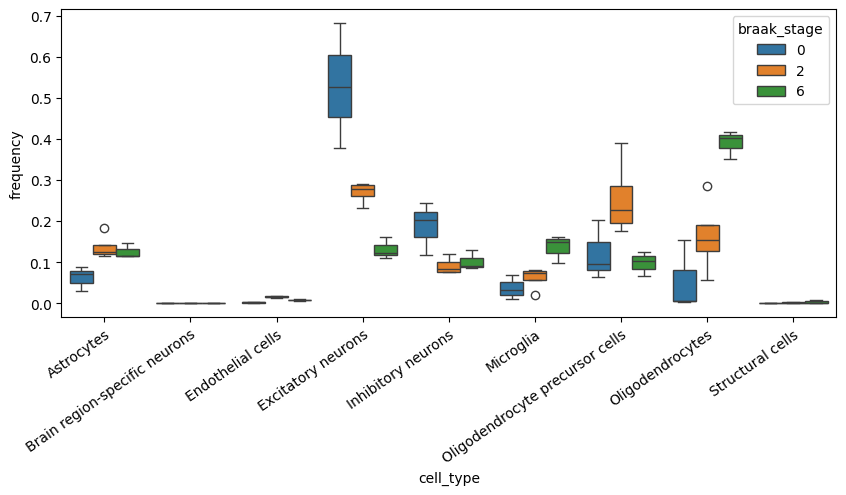

In [37]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))

ax = sns.boxplot(data = cell_type_counts, x = 'cell_type', y = 'frequency', hue = 'braak_stage')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()




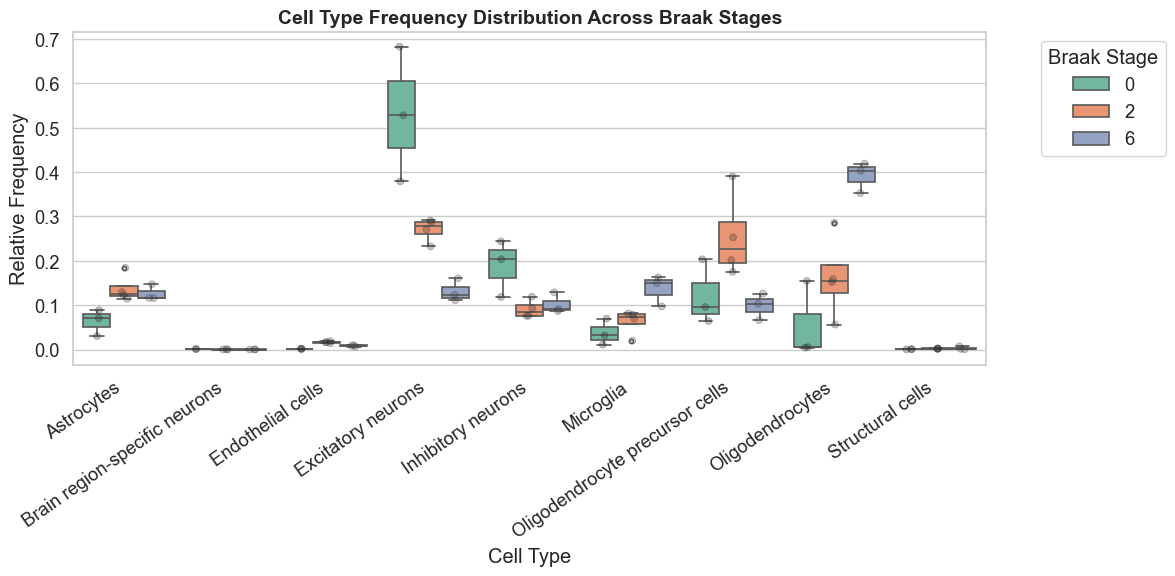

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid", context="notebook", font_scale=1.2)

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=cell_type_counts,
    x='cell_type',
    y='frequency',
    hue='braak_stage',
    palette='Set2',
    linewidth=1.2,
    fliersize=3  # smaller outlier dots
)

# Add stripplot on top (optional, for individual points)
sns.stripplot(
    data=cell_type_counts,
    x='cell_type',
    y='frequency',
    hue='braak_stage',
    dodge=True,
    marker='o',
    alpha=0.3,
    palette='dark:.3',
    linewidth=0.5
)

# Avoid duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(set(cell_type_counts['braak_stage']))], labels[:len(set(cell_type_counts['braak_stage']))], title='Braak Stage', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tweak axis and title
plt.title("Cell Type Frequency Distribution Across Braak Stages", fontsize=14, weight='bold')
plt.xlabel("Cell Type")
plt.ylabel("Relative Frequency")
plt.xticks(rotation=35, ha='right')
plt.tight_layout()

# Optional: save to file
plt.savefig("cell_type_frequency_distribution.pdf", dpi=300, bbox_inches='tight')

plt.show()


In [41]:
# Define significance thresholds
q_threshold = 0.05
logfc_threshold = 0.25

for cell_type, df in de_summaries.items():
    sig_df = df[(df["qval"] < q_threshold) & (df["log2fc"].abs() >= logfc_threshold)]
    
    filename = cell_type.replace(" ", "_").lower() + "_significant_degs.csv"
    path = os.path.join("filtered_de_results_by_cell_type", filename)
    
    sig_df.to_csv(path, index=False)


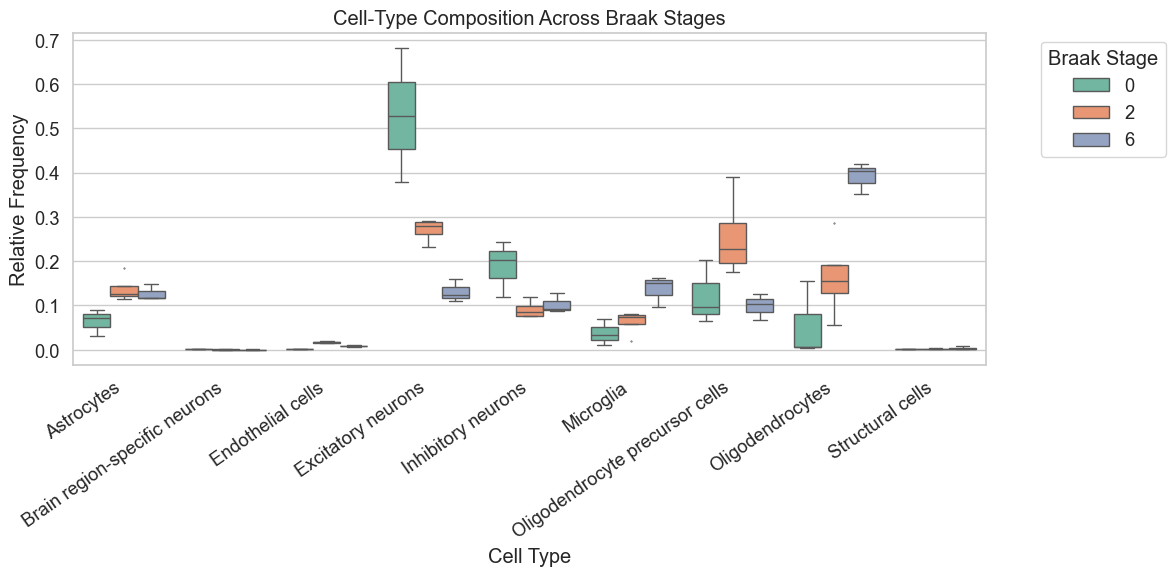

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Initialize figure
plt.figure(figsize=(12, 6))

# Create boxplot
ax = sns.boxplot(
    data=cell_type_counts,
    x='cell_type',
    y='frequency',
    hue='braak_stage',
    palette='Set2',
    fliersize=0.5
)

# Rotate x-axis labels
plt.xticks(rotation=35, ha='right')

# Axis labels and legend
plt.xlabel("Cell Type")
plt.ylabel("Relative Frequency")
plt.title("Cell-Type Composition Across Braak Stages")
plt.legend(title="Braak Stage", bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout and save
plt.tight_layout()
plt.savefig("figures/cell_type_composition_braak_boxplot.pdf", dpi=300)
plt.show()


# Subsampling

In [43]:
adata

AnnData object with n_obs × n_vars = 56037 × 2000
    obs: 'sample_id', 'region', 'brain_region', 'batch', 'donor_id', 'braak_stage', 'sex', 'age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'n_genes', 'solo_doublet', 'solo_singlet', '_scvi_batch', '_scvi_labels', 'supercluster_name', 'cell_type'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_mean_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [44]:
import numpy as np
import scanpy as sc

# 1. Subsample 1000 cells per donor
sampled = []
for donor in adata.obs["donor_id"].unique():
    donor_subset = adata[adata.obs["donor_id"] == donor]
    if donor_subset.n_obs > 1000:
        donor_sample = donor_subset[np.random.choice(donor_subset.obs_names, 1000, replace=False)]
    else:
        donor_sample = donor_subset
    sampled.append(donor_sample)

adata_sampled = sampled[0].concatenate(sampled[1:])

# 2. Re-run DE analysis here with your chosen method
# (e.g., using diffxpy or scanpy.tl.rank_genes_groups)

# 3. Compare logFCs or effect sizes with original full dataset


C:\Users\D_F\AppData\Local\Temp\ipykernel_1696\2127555768.py:14: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_sampled = sampled[0].concatenate(sampled[1:])


In [49]:
import diffxpy.api as de
import scipy.sparse as sp
import numpy as np

cell_key = 'cell_type'
stage_key = 'braak_stage'
donor_key = 'donor_id'
#formula = "~ 1 + braak_stage + donor_id"
formula = "~ 1 + braak_stage"


# 1️⃣ List all unique cell‐types
celltypes = 'Excitatory neurons'
ctype = 'Excitatory neurons'
# 2️⃣ Container for DE summaries
d_de_summaries = {}


subset = adata[adata.obs[cell_key] == ctype].copy()
n_cells = subset.n_obs
print(f'Running DE for {ctype} with {n_cells} nuclei')

 # ──> Pull raw counts from layers['counts'], not from subset.X
    
counts_mat = subset.X

# ──> Densify if needed (diffxpy expects a dense array)
if sp.issparse(counts_mat):
    try:
        X_dense = counts_mat.toarray()
    except MemoryError:
        raise RuntimeError(
            f"Densification failed for cell‐type '{ctype}': "
            "the resulting array is too large to fit in memory. "
            "Consider downsampling or using a machine with more RAM."
            )
else:
    # Already dense (e.g. numpy.ndarray)
    X_dense = counts_mat

# ──> Run Wald test (~ 1 + braak_stage). We still pass subset.obs as sample_description.
test = de.test.wald(
    data               = X_dense,
    sample_description = subset.obs,
    formula_loc        = formula,
    factor_loc_totest  = stage_key,
    gene_names         = subset.var_names
)

# Tidy result as pandas DataFrame (sorted by q‐value) and store
d_de_summaries[ctype] = test.summary().sort_values('qval')

# After the loop, de_summaries dict holds one DataFrame per cell‐type,
# each sorted by q‐value.


Running DE for Excitatory neurons with 14138 nuclei
training location model: False
training scale model: True
iter   0: ll=10736789.190329
iter   1: ll=10736789.190329, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=9107157.225950, converged: 1.15% (loc: 1.15%, scale update: True), in 42.20sec
iter   3: ll=9107157.225950, converged: 1.15% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=9086226.234158, converged: 89.75% (loc: 89.75%, scale update: True), in 39.19sec
iter   5: ll=9086226.234158, converged: 89.75% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=9082605.206803, converged: 95.45% (loc: 95.45%, scale update: True), in 13.94sec
iter   7: ll=9082605.206803, converged: 95.45% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=9081911.832221, converged: 98.75% (loc: 98.75%, scale update: True), in 12.81sec
iter   9: ll=9081911.832221, converged: 98.75% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\dask\array\core.py:2894: RuntimeWarning: divide by zero encountered in divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


caught 101 linalg singular matrix errors


In [4]:
d_de_summaries

NameError: name 'd_de_summaries' is not defined

In [50]:
d_de_summaries.to_csv("exc2_for_subsumpling.csv", index=False)

AttributeError: 'dict' object has no attribute 'to_csv'

In [51]:
import pandas as pd

# Combine all DE results into a single DataFrame with a column for cell type
all_de_results = []

for celltype, df in de_summaries.items():
    df = df.copy()
    df["cell_type"] = celltype
    all_de_results.append(df)

# Concatenate into one large DataFrame
combined_df = pd.concat(all_de_results)

# Save to CSV
combined_df.to_csv("all_deg_results_combined.csv", index=False)

print("✅ Saved to all_deg_results_combined.csv")


✅ Saved to all_deg_results_combined.csv


Correlation of log2FC between full and downsampled: r = 0.130, p = 2.36e-68


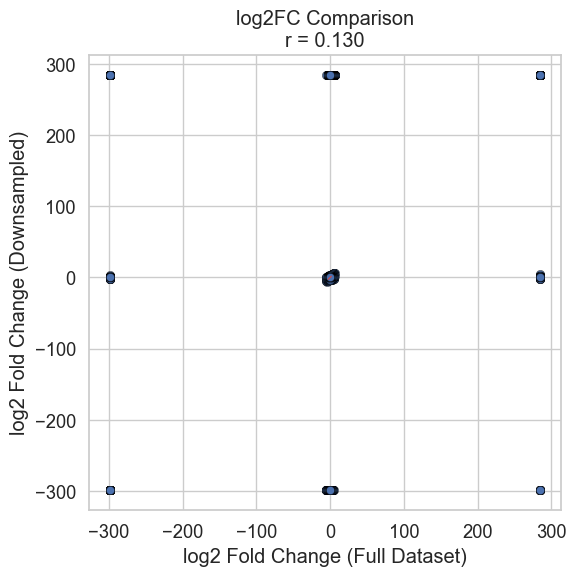

In [52]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Load DE results for a single cell type
# Replace these with actual paths to your saved results
full_de = pd.read_csv("de_summary_Excitatory_neurons.csv")
down_de = pd.read_csv("downsampled_dataset_exc_neurons.csv")

# STEP 2: Merge the two datasets on gene names
merged = full_de.merge(down_de, on="gene", suffixes=("_full", "_down"))

# STEP 3: Calculate Pearson correlation for log2 fold changes
r, p = pearsonr(merged["log2fc_full"], merged["log2fc_down"])
print(f"Correlation of log2FC between full and downsampled: r = {r:.3f}, p = {p:.2e}")

# STEP 4: Plot
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=merged,
    x="log2fc_full", y="log2fc_down",
    alpha=0.6, edgecolor="black"
)
plt.plot([-3, 3], [-3, 3], 'r--', lw=1)
plt.title(f"log2FC Comparison\nr = {r:.3f}")
plt.xlabel("log2 Fold Change (Full Dataset)")
plt.ylabel("log2 Fold Change (Downsampled)")
plt.tight_layout()
plt.savefig("log2fc_correlation_downsampling.pdf")
plt.show()


In [54]:
full_df = pd.read_csv("de_summary_Excitatory_neurons.csv")
down_df = pd.read_csv("downsampled_dataset_exc_neurons.csv")

# Merge on gen
merged = pd.merge(full_df[['gene', 'log2fc']], down_df[['gene', 'log2fc']], on='gene', suffixes=('_full', '_down'))

# Define robust DEG as genes with small fold-change difference and same sign
tolerance = 0.5
same_direction = (merged['log2fc_full'] * merged['log2fc_down']) > 0
diff_small = (merged['log2fc_full'] - merged['log2fc_down']).abs() < tolerance

robust_degs = merged[same_direction & diff_small].copy()

# Save to file or use for GSEA
robust_degs.to_csv("robust_degs.csv", index=False)

# Optionally, show top few
print("Top robust DEGs:")
print(robust_degs.head(10))

Top robust DEGs:
          gene  log2fc_full  log2fc_down
0     MIR325HG     2.051748     2.051748
9   AC129778.2     3.604136     3.604136
18     CNTNAP3     3.186825     3.186825
27    ANKRD18A     2.058132     2.058132
32    ANKRD18A     2.058132     1.726465
36      DNAJB5    -1.658567    -1.658567
37      DNAJB5    -1.658567    -1.210121
39      DNAJB5    -1.658567    -1.852433
41      DNAJB5    -1.658567    -1.312228
45       PRSS3     1.765144     1.765144


In [3]:
top_robust30 = df.sort_values("qval").head(30)

# Save to CSV
top_robust30.to_csv("final_top30_DEGs.csv", index=False)

NameError: name 'df' is not defined

C:\Users\D_F\AppData\Local\Temp\ipykernel_1696\4196518827.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\D_F\AppData\Local\Temp\ipykernel_1696\4196518827.py:27: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


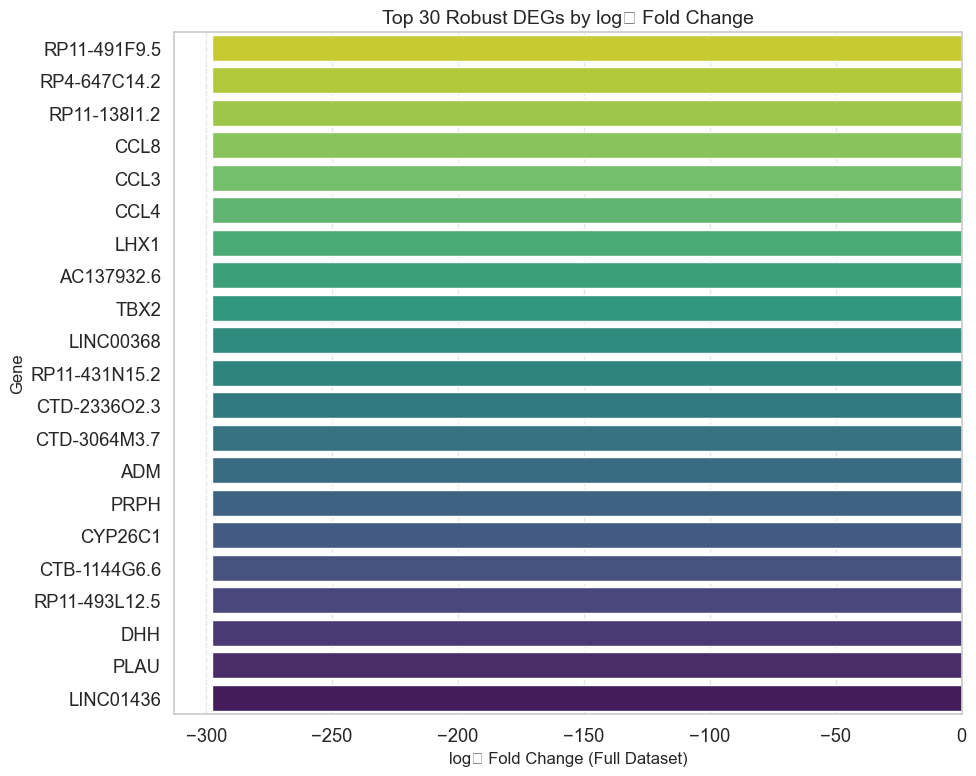

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already created robust_degs:
# robust_degs = merged_df[(abs(merged_df["log2fc_full"] - merged_df["log2fc_down"]) < 0.5)]

# Sort and get top 30 by absolute log2FC in full dataset
top_robust = robust_degs.copy()
top_robust["abs_log2fc"] = top_robust["log2fc_full"].abs()
top_robust = top_robust.sort_values("abs_log2fc", ascending=False).head(30)

# Barplot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_robust,
    y="gene",
    x="log2fc_full",
    palette="viridis"
)

plt.title("Top 30 Robust DEGs by log₂ Fold Change", fontsize=14)
plt.xlabel("log₂ Fold Change (Full Dataset)", fontsize=12)
plt.ylabel("Gene", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.gca().invert_yaxis()  # Puts most upregulated genes at top
plt.tight_layout()
plt.show()


C:\Users\D_F\AppData\Local\Temp\ipykernel_1696\1908417266.py:16: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


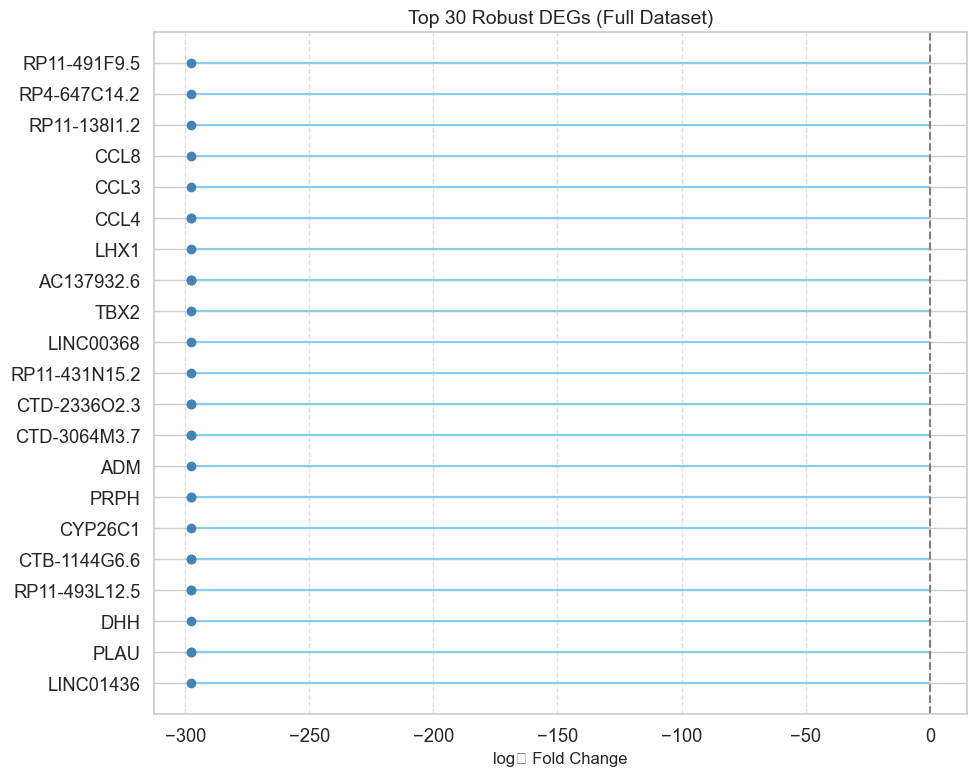

In [56]:
import matplotlib.pyplot as plt

# Sort top genes
top_robust = robust_degs.copy()
top_robust["abs_log2fc"] = top_robust["log2fc_full"].abs()
top_robust = top_robust.sort_values("abs_log2fc", ascending=False).head(30)

# Plot
plt.figure(figsize=(10, 8))
plt.hlines(y=top_robust["gene"], xmin=0, xmax=top_robust["log2fc_full"], color="skyblue")
plt.plot(top_robust["log2fc_full"], top_robust["gene"], "o", color="steelblue")
plt.axvline(0, color="gray", linestyle="--")
plt.title("Top 30 Robust DEGs (Full Dataset)", fontsize=14)
plt.xlabel("log₂ Fold Change", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# Extracting Top Up & Downregulated Genes

In [60]:
# Choose the DE result for Excitatory neurons
de_df = de_summaries["Excitatory"]

# Confirm the name of the log2 fold-change column
print(de_df.columns)  # Run this to find the correct column name

KeyError: 'Excitatory'

In [9]:
df = pd.read_csv("robust_degs.csv")

In [10]:
df

,gene,log2fc_full,log2fc_down
0,MIR325HG,2.051748,2.051748
1,AC129778.2,3.604136,3.604136
2,CNTNAP3,3.186825,3.186825
3,ANKRD18A,2.058132,2.058132
4,ANKRD18A,2.058132,1.726465
...,...,...,...
5078,KIR3DL1,283.913085,283.913085
5079,KIR3DL1,283.913085,283.913085
5080,OSM,-297.776029,-297.776029
5081,OSM,-297.776029,-297.776029


In [12]:
import pandas as pd

# Load the DEGs CSV (adjust path as needed)
df = pd.read_csv("robust_degs.csv")

# Drop duplicates and NaNs if needed
df = df.dropna().drop_duplicates(subset=["gene", "log2fc_full"])

# Compute the average absolute log2fc between full and downsampled for sorting
df["mean_log2fc"] = (df["log2fc_full"].abs() + df["log2fc_down"].abs()) / 2

# Sort by mean effect size and select top 3
top3 = df.sort_values("mean_log2fc", ascending=False).head(30)

# Classify direction
top3["direction"] = top3["log2fc_full"].apply(lambda x: "Up" if x > 0 else "Down")

# Reformat for table
top3_table = top3[["gene", "direction", "log2fc_full"]]
top3_table.columns = ["Gene", "Direction", "log2FC"]
print(top3_table.to_string(index=False))


         Gene Direction      log2FC
    LINC01436      Down -297.776029
     HIST1H3J      Down -297.776029
 RP1-104O17.3      Down -297.776029
  RP1-199J3.7      Down -297.776029
  RP3-355L5.5      Down -297.776029
  RP11-2E11.5      Down -297.776029
RP11-431N15.2      Down -297.776029
 CTD-2336O2.3      Down -297.776029
  KB-1043D8.6      Down -297.776029
 RP11-290M5.4      Down -297.776029
          ADM      Down -297.776029
         PLAU      Down -297.776029
      CYP26C1      Down -297.776029
 CTB-1144G6.6      Down -297.776029
RP11-493L12.5      Down -297.776029
          DHH      Down -297.776029
         PRPH      Down -297.776029
          TNF      Down -297.776029
 RP3-500L14.2      Down -297.776029
 RP4-647C14.2      Down -297.776029
         STC2      Down -297.776029
        VCAM1      Down -297.776029
         GJA5      Down -297.776029
    LINC01133      Down -297.776029
       MT1HL1      Down -297.776029
         IL1B      Down -297.776029
RP11-256I23.3      Down -297